# MNIST


In [1]:
import tensorflow as tf
import numpy as np
modelMNIST = tf.keras.models.Sequential()
modelMNIST.add(tf.keras.layers.Flatten())
modelMNIST.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
modelMNIST.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
modelMNIST.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
modelMNIST.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [2]:
from keras.datasets import mnist

(x_trainMNIST, y_trainMNIST), (x_testMNIST, y_testMNIST) = mnist.load_data()
x_trainMNIST = tf.keras.utils.normalize(x_trainMNIST, axis=1)
x_testMNIST = tf.keras.utils.normalize(x_testMNIST, axis=1)


Using TensorFlow backend.


In [3]:
x_testMNIST.shape

(10000, 28, 28)

In [14]:
modelMNIST.fit(x_trainMNIST,y_trainMNIST, epochs=4)


Epoch 1/4
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0558 - acc: 0.9819
Epoch 2/4
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0411 - acc: 0.9870
Epoch 3/4
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0330 - acc: 0.9890
Epoch 4/4
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0252 - acc: 0.9916


In [7]:
val_lossMNIST, val_accMNIST = modelMNIST.evaluate(x_testMNIST,y_testMNIST)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.1007 - acc: 0.9683


In [10]:
print("loss:",val_lossMNIST)
predictionsMNIST = modelMNIST.predict(x_testMNIST)


loss: 0.10072047825437039


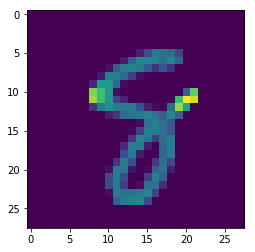

8


In [13]:

import random
indexMNIST = random.randint(0,999)
import matplotlib.pyplot as plt
plt.imshow(x_testMNIST[indexMNIST])
plt.show()
print(np.argmax(predictionsMNIST[indexMNIST]))


# MR BRAIN

In [0]:
import tensorflow as tf
import numpy as np
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(32,32,1)))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(2,activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
x_train = np.load('mrbraintrainx.npy')
y_train = np.load('mrbraintrainy.npy')
x_test = np.load('mrbraintestx.npy')
y_test = np.load('mrbraintesty.npy')

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [43]:
len(x_test)

20

In [54]:
#from keras.callbacks import ModelCheckpoint
#filepath = "saved-model-{epoch:02d}-{val_acc:.2f}.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=150, batch_size=10, callbacks=[checkpoint], verbose=0)
from keras.preprocessing.image import ImageDataGenerator
x_train_augmented = x_train[:,:,:,np.newaxis]
x_train_augmented.shape
datagen = ImageDataGenerator(horizontal_flip = True)
model.fit_generator(datagen.flow(x_train_augmented, y_train, batch_size=1000), steps_per_epoch=40, epochs=200)


Epoch 1/200
40/40 [==============================] - 4s 99ms/step - loss: 0.4587 - acc: 0.7618
Epoch 2/200
40/40 [==============================] - 4s 101ms/step - loss: 0.4452 - acc: 0.7733
Epoch 3/200
40/40 [==============================] - 4s 101ms/step - loss: 0.4464 - acc: 0.7693
Epoch 4/200
40/40 [==============================] - 4s 101ms/step - loss: 0.4431 - acc: 0.7712
Epoch 5/200
40/40 [==============================] - 4s 101ms/step - loss: 0.4344 - acc: 0.7777
Epoch 6/200
40/40 [==============================] - 4s 101ms/step - loss: 0.4336 - acc: 0.7776
Epoch 7/200
40/40 [==============================] - 4s 101ms/step - loss: 0.4237 - acc: 0.7843
Epoch 8/200
40/40 [==============================] - 4s 101ms/step - loss: 0.4105 - acc: 0.7915
Epoch 9/200
40/40 [==============================] - 4s 101ms/step - loss: 0.4163 - acc: 0.7891
Epoch 10/200
40/40 [==============================] - 4s 101ms/step - loss: 0.3970 - acc: 0.8004
Epoch 11/200
40/40 [====================

In [55]:
x_test_augmented = x_test[:,:,:,np.newaxis]
val_loss, val_acc = model.evaluate(x_test_augmented,y_test)

20/20 [==============================] - 0s 115us/sample - loss: 1.0444 - acc: 0.7500


In [56]:
print("loss:",val_loss)
predictions = model.predict(x_test_augmented)


loss: 1.0444376468658447


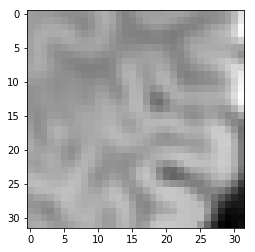

1


In [57]:
import random
index = random.randint(0,19)
import matplotlib.pyplot as plt
plt.imshow(x_test[index], cmap='gray')
plt.show()
print(np.argmax(predictions[index]))